# Expedia Personalised Hotel Searches
VU Data Mining Techniques 2024 | Assignment 2 | Group 17

## Setup & Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
train_path = 'data/training_set_VU_DM.csv'
test_path = 'data/test_set_VU_DM.csv'

In [3]:
df = pd.read_csv(train_path)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


## EDA
###### ToDo Jaime

In [4]:
competitive_metrics = ['compX_rate', 'compX_inv', "compX_rate_percent_diff"]
full_competitive_metrics = []
for metric in competitive_metrics:
    metric_list = []
    for x in range(1,9):
        metric_list.append(metric.replace("X", str(x)))
    full_competitive_metrics.append(metric_list)

In [5]:
len(df)

4958347

In [6]:
len(df[full_competitive_metrics[2]].dropna(axis = 'index', how = 'all'))

1580490

too much nan values

In [7]:
len(df[full_competitive_metrics[1]].dropna(axis = 'index', how = 'all'))

3352374

feature not relevant enough.

In [8]:
df['combined_comp_rate'] = df[full_competitive_metrics[0]].iloc[:, :].sum(axis=1)

In [9]:
comp_rate_nan_index = df.index.difference(df[full_competitive_metrics[0]].dropna(axis = 'index', how = 'all').index)
df.loc[comp_rate_nan_index, 'combined_comp_rate'] = np.nan

In [10]:
print(len(pd.unique(df['srch_id'])))
print(df['click_bool'].sum())
print(df['booking_bool'].sum())

199795
221879
138390


On average more clicks than searches. On average less bookings than searches. Makes sense

In [11]:
def plot_vars_dist(df):
    variables = [var for var in df if var not in ['srch_id','date_time']]  # ignoring these as they are only 1 value indicating occurence of a call/sms
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 6 * len(variables)))

    for ax, var in zip(axes.flatten(), variables):
        var_data = df[var]
        mean = var_data.mean()
        std = var_data.std()
        # Adjust bins for better visualization based on data range and characteristics
        bins = min(30, int(var_data.nunique()))  # Use a minimum of 30 bins or less if fewer unique values

        ax.hist(var_data, bins=bins, alpha=0.75, color='blue', edgecolor='black', label=f'{var} Scores')
        ax.set_title(f'Distribution of {var} values')
        ax.set_xlabel(f'{var.capitalize()} Score')
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.75)
        legend_label = f"Mean: {mean:.2f}, Std: {std:.2f}"
        ax.legend([f"{var.capitalize()} Scores\n{legend_label}"], loc='upper right', title='Statistics', frameon=True)

    plt.tight_layout()
    plt.show()

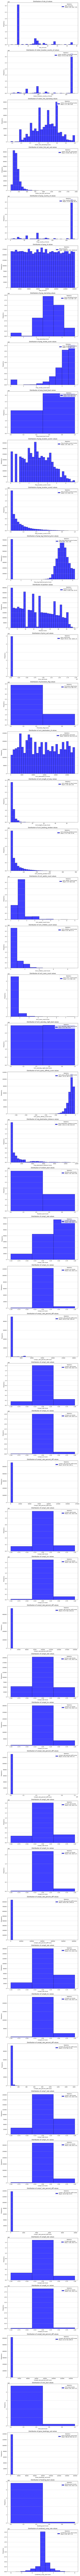

In [12]:
plot_vars_dist(df)

In [13]:
df_corr = df.drop(['srch_id','date_time'],axis = 1)

In [14]:
df_corr.corr()

,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,combined_comp_rate
site_id,1.000000,-0.305921,0.309078,0.099104,-0.312593,0.002943,0.174845,-0.071645,-0.196217,0.178399,...,-0.001217,-0.011761,-0.004750,0.012756,-0.005167,0.000152,0.008497,0.053015,-0.001354,0.039374
visitor_location_country_id,-0.305921,1.000000,-0.256252,-0.073231,0.482787,0.000432,-0.112911,0.064279,0.182405,-0.121392,...,0.004379,-0.006172,-0.017498,-0.016626,0.010390,-0.001532,-0.004806,-0.048212,0.002524,-0.036283
visitor_hist_starrating,0.309078,-0.256252,1.000000,0.498618,-0.285770,0.007933,0.295903,-0.000815,-0.183249,0.250895,...,-0.001198,-0.005446,-0.001889,0.034486,0.000307,0.004346,0.002541,0.104260,-0.002044,0.043633
visitor_hist_adr_usd,0.099104,-0.073231,0.498618,1.000000,-0.073566,0.000575,0.153966,0.046391,-0.057195,0.152472,...,0.004687,0.011371,-0.010601,0.006237,-0.002069,0.002971,0.003858,0.108476,0.000602,0.017158
prop_country_id,-0.312593,0.482787,-0.285770,-0.073566,1.000000,0.000162,-0.161729,0.092686,0.310493,-0.183344,...,-0.007162,-0.061137,-0.024660,-0.031299,0.011225,-0.002427,-0.006222,-0.064152,0.001227,-0.059641
prop_id,0.002943,0.000432,0.007933,0.000575,0.000162,1.000000,0.002553,-0.000103,0.000922,-0.003706,...,-0.005572,-0.002152,0.007769,0.003004,0.003048,-0.001985,0.000246,0.002713,-0.000508,0.000747
prop_starrating,0.174845,-0.112911,0.295903,0.153966,-0.161729,0.002553,1.000000,0.306454,0.021329,0.287322,...,-0.016826,-0.028579,-0.011136,0.037041,-0.030334,0.015429,0.030788,0.175424,0.021206,0.029376
prop_review_score,-0.071645,0.064279,-0.000815,0.046391,0.092686,-0.000103,0.306454,1.000000,0.203949,0.111115,...,-0.008081,0.003435,-0.009931,0.068148,-0.006711,0.006997,0.023424,0.076358,0.025800,0.030631
prop_brand_bool,-0.196217,0.182405,-0.183249,-0.057195,0.310493,0.000922,0.021329,0.203949,1.000000,-0.184617,...,-0.002585,-0.062500,-0.036992,-0.011238,-0.057156,-0.001317,0.000866,-0.033181,0.009991,-0.038328
prop_location_score1,0.178399,-0.121392,0.250895,0.152472,-0.183344,-0.003706,0.287322,0.111115,-0.184617,1.000000,...,-0.001695,0.038725,-0.003553,0.012608,-0.005817,0.012368,0.002184,0.142669,-0.003273,0.048487


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 55 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [16]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,combined_comp_rate
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06,3.241539e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02,5.521328e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01,1.096373e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00,-6.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00,6.000000e+00


In [17]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

## Data Preprocessing
###### ToDo Ryan

### Datatype Conversion & Grouping Features

In [18]:
df['date_time'] = pd.to_datetime(df['date_time'])

boolean_features = ['prop_brand_bool', 'promotion_flag', 'srch_saturday_night_bool', 'random_bool', 'click_bool', 'booking_bool']
for col in boolean_features:
    df[col] = df[col].astype('bool')
    
categorical_features = ['site_id', 'visitor_location_country_id', 'prop_country_id']  # 'srch_id', 'prop_id' and 'srch_destination_id' are not included because they are real identifiers rather than categorical features
for col in categorical_features:
    df[col] = df[col].astype('category')
    
numerical_features = [col for col in df.columns if col not in boolean_features + categorical_features + ['date_time', 'srch_id', 'prop_id', 'srch_destination_id']]
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 55 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   srch_id                      int64         
 1   date_time                    datetime64[ns]
 2   site_id                      category      
 3   visitor_location_country_id  category      
 4   visitor_hist_starrating      float64       
 5   visitor_hist_adr_usd         float64       
 6   prop_country_id              category      
 7   prop_id                      int64         
 8   prop_starrating              int64         
 9   prop_review_score            float64       
 10  prop_brand_bool              bool          
 11  prop_location_score1         float64       
 12  prop_location_score2         float64       
 13  prop_log_historical_price    float64       
 14  position                     int64         
 15  price_usd                    float64       
 16  

### Removing Outliers for Numerical Features

!ToDo: Come back to this once we have something like boxplots to see what our data looks like

In [19]:
num_feats_with_outliers = ['price_usd', 'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff', 'srch_booking_window', 'orig_destination_distance']
outliers = pd.Series(data=False, index=df.index)

for feature in ['price_usd']:  #TODO: instead of all numerical features, perhaps only for price_usd & compX_rate_percent_diff - maaaybe srch_booking_window, orig_destination_distance. Investigate this based on further EDA (boxplots for example)
    # Print initial statistics
    initial_stats = df[feature].describe()
    print(f'Initial stats for {feature}:')
    print(initial_stats)

    # Calculating IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # increase to 3 if we want to be less strict
    upper_bound = Q3 + 1.5 * IQR
    
    feature_outliers = ~df[feature].between(lower_bound, upper_bound)
    outliers |= feature_outliers
    
df = df[~outliers]

Initial stats for price_usd:
count    4.958347e+06
mean     2.542096e+02
std      1.600124e+04
min      0.000000e+00
25%      8.500000e+01
50%      1.220000e+02
75%      1.849600e+02
max      1.972633e+07
Name: price_usd, dtype: float64


In [20]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,combined_comp_rate
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,False,NaN,False,0.0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,False,NaN,False,0.0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,False,NaN,False,0.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,False,NaN,False,0.0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,0.0,0.0,7.0,False,NaN,False,0.0


In [21]:
print(f'Number of rows post outlier removal: {len(df)}')

Number of rows post outlier removal: 4663867


### Imputing Missing Values for Numerical Features

Zero was chosen as the imputation value for the numerical features because it intuitively denotes a missing record, for the competitor data where we have either +1, 0, -1, assuming 0 in the case of missing data assumes no advantage for Expedia or a competitor.

In [22]:
print('Missing values replaced with 0:')
print('------------------------------')
for feature in numerical_features:
    print(f'{feature} - {df[feature].isna().sum()}')
    df.fillna({feature: 0}, inplace=True)

Missing values replaced with 0:
------------------------------
visitor_hist_starrating - 4427242
visitor_hist_adr_usd - 4426170
prop_starrating - 0
prop_review_score - 7089
prop_location_score1 - 0
prop_location_score2 - 1041778
prop_log_historical_price - 0
position - 0
price_usd - 0
srch_length_of_stay - 0
srch_booking_window - 0
srch_adults_count - 0
srch_children_count - 0
srch_room_count - 0
srch_query_affinity_score - 4361229
orig_destination_distance - 1493816
comp1_rate - 4565828
comp1_inv - 4557711
comp1_rate_percent_diff - 4587105
comp2_rate - 2744242
comp2_inv - 2648694
comp2_rate_percent_diff - 4140251
comp3_rate - 3221074
comp3_inv - 3112390
comp3_rate_percent_diff - 4224784
comp4_rate - 4389173
comp4_inv - 4359402
comp4_rate_percent_diff - 4545881
comp5_rate - 2581860
comp5_inv - 2457982
comp5_rate_percent_diff - 3873412
comp6_rate - 4445385
comp6_inv - 4427819
comp6_rate_percent_diff - 4576808
comp7_rate - 4373129
comp7_inv - 4338168
comp7_rate_percent_diff - 4537063
com

### Computing EXP Features for Categorical Features

EXP features involve calculating the probability of a target variable (booking & click in our case) given a certain categorical feature. This is done by grouping the data by the categorical feature and calculating the mean of the booking/click_bool column. This is then merged back into the original dataframe to create the new feature that is in numerical space.

In [23]:
for feature in categorical_features:
    # Initialize new columns for EXP features
    df[f'{feature}_exp_click'] = np.nan
    df[f'{feature}_exp_booking'] = np.nan
    
    # Iterate over each category in the feature
    for category in df[feature].unique():
        # Create mask for the current category
        category_mask = df[feature] == category
        
        # Calculate sums and counts excluding the current row
        # We use sum and count to calculate the mean without the current row
        sum_click = df.loc[category_mask, 'click_bool'].sum()
        count_click = category_mask.sum()
        sum_booking = df.loc[category_mask, 'booking_bool'].sum()
        count_booking = category_mask.sum()
        
        # Assign the leave-one-out mean to the rows of the current category
        # For each row, we use (sum - current value) / (count - 1) to get the leave-one-out mean
        # Important to leave out the current row when calculating the mean to prevent data leakage
        df.loc[category_mask, f'{feature}_exp_click'] = (sum_click - df['click_bool']) / (count_click - 1)
        df.loc[category_mask, f'{feature}_exp_booking'] = (sum_booking - df['booking_bool']) / (count_booking - 1)

# Handle cases where the category only has one row and thus (count - 1) would be zero
for feature in categorical_features:
    df.fillna({f'{feature}_exp_click': df['click_bool'].mean()}, inplace=True)
    df.fillna({f'{feature}_exp_booking': df['booking_bool'].mean()}, inplace=True)

In [24]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,click_bool,gross_bookings_usd,booking_bool,combined_comp_rate,site_id_exp_click,site_id_exp_booking,visitor_location_country_id_exp_click,visitor_location_country_id_exp_booking,prop_country_id_exp_click,prop_country_id_exp_booking
0,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,893,3,3.5,...,False,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998
1,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,10404,4,4.0,...,False,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998
2,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,21315,3,4.5,...,False,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998
4,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,29604,4,3.5,...,False,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998
5,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,30184,4,4.5,...,False,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998


### Feature Engineering

#### 'Proxy' Prior for Property Position in Results

In [25]:
filtered_df = df[df['random_bool'] == False]  #? Exclude records where the results order is random
mean_positions = filtered_df.groupby('prop_id')['position'].mean().rename('mean_position')
df = df.join(mean_positions, on='prop_id')

In [26]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,gross_bookings_usd,booking_bool,combined_comp_rate,site_id_exp_click,site_id_exp_booking,visitor_location_country_id_exp_click,visitor_location_country_id_exp_booking,prop_country_id_exp_click,prop_country_id_exp_booking,mean_position
0,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,893,3,3.5,...,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,25.861284
1,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,10404,4,4.0,...,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,23.498925
2,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,21315,3,4.5,...,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,24.150000
4,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,29604,4,3.5,...,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,12.739292
5,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,30184,4,4.5,...,0.0,False,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,10.886756


#### Prior of Booking/Clicks per Property

In [27]:
def compute_prior(df, group_field, value_field):
    # Sum and count values per group
    sums = df.groupby(group_field)[value_field].transform('sum')
    count = df.groupby(group_field)[value_field].transform('count')
    
    # Calculate leave-one-out prior
    prior = (sums - df[value_field]) / (count - 1)
    return prior

In [28]:
# Apply function for click and booking bool
df['click_prior'] = compute_prior(df, 'prop_id', 'click_bool')
df['booking_prior'] = compute_prior(df, 'prop_id', 'booking_bool')

# Handling cases with only one record per group
df.fillna({'click_prior': df['click_bool'].mean()}, inplace=True)
df.fillna({'booking_prior': df['booking_bool'].mean()}, inplace=True)

In [29]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,combined_comp_rate,site_id_exp_click,site_id_exp_booking,visitor_location_country_id_exp_click,visitor_location_country_id_exp_booking,prop_country_id_exp_click,prop_country_id_exp_booking,mean_position,click_prior,booking_prior
0,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,893,3,3.5,...,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,25.861284,0.026187,0.016367
1,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,10404,4,4.0,...,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,23.498925,0.025818,0.015491
2,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,21315,3,4.5,...,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,24.150000,0.009107,0.003643
4,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,29604,4,3.5,...,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,12.739292,0.051282,0.036199
5,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,30184,4,4.5,...,0.0,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,10.886756,0.045242,0.021841


#### Number of Previous Search Resutls Containing the Property

In [30]:
# Number of occurences "minus the current row"
df['previous_searches'] = df.groupby('prop_id')['prop_id'].transform('count') - 1

In [31]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,site_id_exp_click,site_id_exp_booking,visitor_location_country_id_exp_click,visitor_location_country_id_exp_booking,prop_country_id_exp_click,prop_country_id_exp_booking,mean_position,click_prior,booking_prior,previous_searches
0,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,893,3,3.5,...,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,25.861284,0.026187,0.016367,611
1,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,10404,4,4.0,...,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,23.498925,0.025818,0.015491,581
2,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,21315,3,4.5,...,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,24.150000,0.009107,0.003643,549
4,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,29604,4,3.5,...,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,12.739292,0.051282,0.036199,663
5,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,30184,4,4.5,...,0.050128,0.025717,0.050624,0.024945,0.044218,0.028998,10.886756,0.045242,0.021841,641


#### Statistical Features for Each Property

Mean, median & std for selected features across all instances of each property

In [32]:
features_to_stat = [feature for feature in df.columns if df[feature].dtype == 'float64']
for feature in tqdm(features_to_stat):
    print(feature)
    stats = df.groupby('prop_id')[feature].agg(['min', 'max', 'mean', 'median', 'std']).rename(
        columns={'min': f'{feature}_min', 'max': f'{feature}_max', 'mean': f'{feature}_mean', 'median': f'{feature}_median', 'std': f'{feature}_std'})
    df = df.join(stats, on='prop_id')

visitor_hist_starrating
visitor_hist_adr_usd
prop_review_score
prop_location_score1
prop_location_score2
prop_log_historical_price
price_usd
srch_query_affinity_score
orig_destination_distance
comp1_rate
comp1_inv
comp1_rate_percent_diff
comp2_rate
comp2_inv
comp2_rate_percent_diff
comp3_rate
comp3_inv
comp3_rate_percent_diff
comp4_rate
comp4_inv
comp4_rate_percent_diff
comp5_rate
comp5_inv
comp5_rate_percent_diff
comp6_rate
comp6_inv
comp6_rate_percent_diff
comp7_rate
comp7_inv
comp7_rate_percent_diff
comp8_rate
comp8_inv
comp8_rate_percent_diff
gross_bookings_usd
combined_comp_rate
site_id_exp_click
site_id_exp_booking
visitor_location_country_id_exp_click
visitor_location_country_id_exp_booking
prop_country_id_exp_click
prop_country_id_exp_booking
mean_position
click_prior
booking_prior


In [33]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,click_prior_min,click_prior_max,click_prior_mean,click_prior_median,click_prior_std,booking_prior_min,booking_prior_max,booking_prior_mean,booking_prior_median,booking_prior_std
0,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,893,3,3.5,...,0.024550,0.026187,0.026144,0.026187,0.000261,0.014730,0.016367,0.016340,0.016367,0.000208
1,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,10404,4,4.0,...,0.024096,0.025818,0.025773,0.025818,0.000273,0.013769,0.015491,0.015464,0.015491,0.000213
2,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,21315,3,4.5,...,0.007286,0.009107,0.009091,0.009107,0.000173,0.001821,0.003643,0.003636,0.003643,0.000110
4,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,29604,4,3.5,...,0.049774,0.051282,0.051205,0.051282,0.000333,0.034691,0.036199,0.036145,0.036199,0.000282
5,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,30184,4,4.5,...,0.043682,0.045242,0.045171,0.045242,0.000324,0.020281,0.021841,0.021807,0.021841,0.000228
